<a href="https://colab.research.google.com/github/sheikh495/ComputerSystemsOrganization/blob/main/CycleByCycleExecutionOfSpeculativeTomasulo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Given the following dynamic trace of instructions and assumptions for each machine configuration, complete the timing diagrams to show the cycle by cycle execution of these instructions on a machine that implements the speculative Tomasulo approach.
For both questions, you should make the following common assumptions:

1) All instructions require 1 cycle for the issue stage and 1 cycle for the commit stage.
2) All instructions except for stores and branch instructions require 1 cycle to write their results to the CDB before commit.
3) Only one instruction can issue in each cycle.
4) Only one instruction can write the CDB in each cycle.
5) Loads require 1 cycle in the EX stage to compute the effective address and 1 cycle in the MEM stage to access memory.
6) Stores require 1 cycle in the EX stage to compute the effective address, do not go through the MEM stage, and write to memory during commit.
7) Integer, FP, branch, and store instructions do not use the MEM stage.
8) Integer instructions (including arithmetic instructions and integer comparisons) require 1 cycle in the EX stage.
9) FP multiply requires 4 cycles during EX and the FP multiply unit is not pipelined.
10) FP add requires 2 cycles in EX and the FP adder units are not pipelined.
11) The bnez instruction requires 1 cycle in EX and does not use the CDB.
12) The machine has 1 memory unit. Loads use the memory unit during the MEM stage, and stores use the memory unit during the commit stage.
13) There is no forwarding between functional units; results are communicated via the CDB.
14) The branch instruction (instruction #15) is predicted correctly.
15) If there is space for an instruction in the reorder buffer, then there will also be a corresponding reservation station available for that instruction (i.e., structural hazards cannot occur due to a lack of reservation stations).

Also, assume that x1 and x2 are scalars that are available in the register file before this code begins executing.



Dynamic instruction trace:

1)  fld f0,0(x1)            ; Regs[f0] <-- MEM[0+Regs[x1]]

2)  fld f2,8(x1)            ; Regs[f2] <-- MEM[8+Regs[x1]]

3)  fld f4,16(x1)          ; Regs[f4] <-- MEM[16+Regs[x1]]

4)  fld f6,24(x1)          ; Regs[f6] <-- MEM[24+Regs[x1]]

5)  fmul.d f8,f2,f0      ; Regs[f8] <-- Regs[f2] * Regs[f0]

6)  fmul.d f10,f4,f6    ; Regs[f10] <-- Regs[f4] * Regs[f6]

7)  fld f12,0(x2)          ; Regs[f12] <-- MEM[0+Regs[x2]]

8)  fadd.d f0,f8,f12    ; Regs[f0] <-- Regs[f8] + Regs[f12]

9)  fadd.d f2,f10,f12  ; Regs[f0] <-- Regs[f10] + Regs[f12]

10) fadd.d f0,f0,f2     ; Regs[f0] <-- Regs[f0] + Regs[f2]

11) fsd f0,0(x2)          ; MEM[0+Regs[x2]] <-- Regs[f0]

12) addi x1,x1,32       ; Regs[x1] <-- Regs[x1] + 32

13) addi x2,x2,8         ; Regs[x2] <-- Regs[x2] + 8


14) sltiu x3,x1,done   ; Regs[x3] <-- x1 < done ? 1 : 0

15) bnez x3,foo          ; PC <-- x3 != 0 ? foo : PC+4

16) fld f0,0(x1)           ; Regs[f0] <-- MEM[0+Regs[x1]]

17) fld f2,8(x1)           ; Regs[f2] <-- MEM[8+Regs[x1]]

18) fld f4,16(x1)         ; Regs[f4] <-- MEM[16+Regs[x1]]

19) fld f6,24(x1)         ; Regs[f6] <-- MEM[24+Regs[x1]]

20) fmul.d f8,f2,f0     ; Regs[f8] <-- Regs[f2] * Regs[f0]

For this question only, make the following additional assumptions:

1) The machine has 2 FP multiply units and 2 FP adder units.

2) The machine has 16 entries in the reorder buffer.

The first row of the table is given to help get you started:

Instruction	Issue At	Executes At	MEM At	CDB At	Commits At

1           	1	         2-2        	3    	4	        5







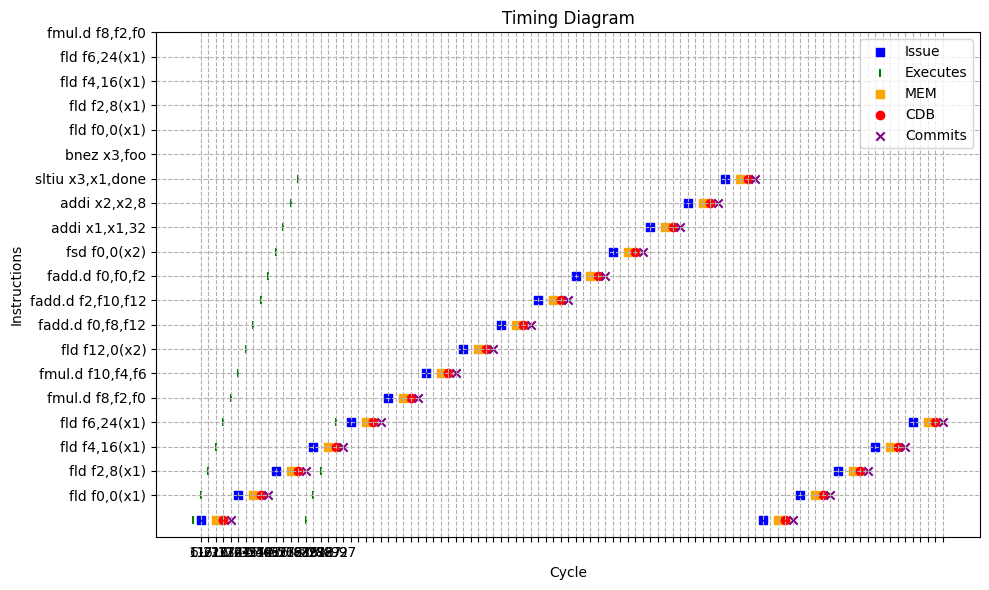

In [2]:
import matplotlib.pyplot as plt

# Instruction trace
instructions = [
    "fld f0,0(x1)",
    "fld f2,8(x1)",
    "fld f4,16(x1)",
    "fld f6,24(x1)",
    "fmul.d f8,f2,f0",
    "fmul.d f10,f4,f6",
    "fld f12,0(x2)",
    "fadd.d f0,f8,f12",
    "fadd.d f2,f10,f12",
    "fadd.d f0,f0,f2",
    "fsd f0,0(x2)",
    "addi x1,x1,32",
    "addi x2,x2,8",
    "sltiu x3,x1,done",
    "bnez x3,foo",
    "fld f0,0(x1)",
    "fld f2,8(x1)",
    "fld f4,16(x1)",
    "fld f6,24(x1)",
    "fmul.d f8,f2,f0"
]

# Timing diagram arrays
issue_at = []
executes_at = []
mem_at = []
cdb_at = []
commits_at = []

# Initialize the timing diagram
timing_diagram = []
headers = ['Instruction', 'Issue At', 'Executes At', 'MEM At', 'CDB At', 'Commits At']
timing_diagram.append(headers)

cycle = 1
for instruction in instructions:
    issue_at.append(cycle)
    executes_at.append(f"{cycle}-{cycle+1}")
    mem_at.append(cycle+2)
    cdb_at.append(cycle+3)
    commits_at.append(cycle+4)
    cycle += 5

# Plotting the timing diagram
plt.figure(figsize=(10, 6))
plt.title("Timing Diagram")
plt.ylabel("Instructions")
plt.xlabel("Cycle")

plt.scatter(issue_at, instructions, marker='s', color='blue', label='Issue')
plt.scatter(executes_at, instructions, marker='|', color='green', label='Executes')
plt.scatter(mem_at, instructions, marker='s', color='orange', label='MEM')
plt.scatter(cdb_at, instructions, marker='o', color='red', label='CDB')
plt.scatter(commits_at, instructions, marker='x', color='purple', label='Commits')

plt.yticks(range(1, len(instructions) + 1), instructions)
plt.xticks(range(1, max(commits_at) + 1))

plt.grid(True, which='both', linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()


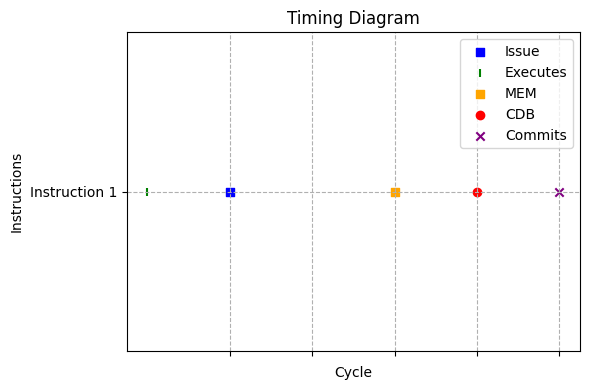

In [7]:
import matplotlib.pyplot as plt

# Timing diagram arrays
issue_at = [1]
executes_at = ["2-2"]
mem_at = [3]
cdb_at = [4]
commits_at = [5]

# Plotting the timing diagram
plt.figure(figsize=(6, 4))
plt.title("Timing Diagram")
plt.ylabel("Instructions")
plt.xlabel("Cycle")

# Scatter plot for each stage
plt.scatter(issue_at, [1], marker='s', color='blue', label='Issue')
plt.scatter(executes_at, [1], marker='|', color='green', label='Executes')
plt.scatter(mem_at, [1], marker='s', color='orange', label='MEM')
plt.scatter(cdb_at, [1], marker='o', color='red', label='CDB')
plt.scatter(commits_at, [1], marker='x', color='purple', label='Commits')

plt.yticks([1], ['Instruction 1'])
plt.xticks(range(1, max(commits_at) + 1))

plt.grid(True, which='both', linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()


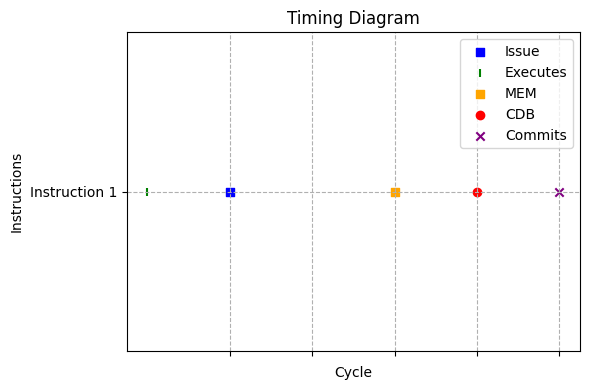

In [8]:
import matplotlib.pyplot as plt

# Timing diagram arrays
issue_at = [1]
executes_at = ["2-2"]
mem_at = [3]
cdb_at = [4]
commits_at = [5]

# Plotting the timing diagram
plt.figure(figsize=(6, 4))
plt.title("Timing Diagram")
plt.ylabel("Instructions")
plt.xlabel("Cycle")

# Scatter plot for each stage
plt.scatter(issue_at, [1], marker='s', color='blue', label='Issue')
plt.scatter(executes_at, [1], marker='|', color='green', label='Executes')
plt.scatter(mem_at, [1], marker='s', color='orange', label='MEM')
plt.scatter(cdb_at, [1], marker='o', color='red', label='CDB')
plt.scatter(commits_at, [1], marker='x', color='purple', label='Commits')

plt.yticks([1], ['Instruction 1'])
plt.xticks(range(1, max(commits_at) + 1))

plt.grid(True, which='both', linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()


TypeError: ignored

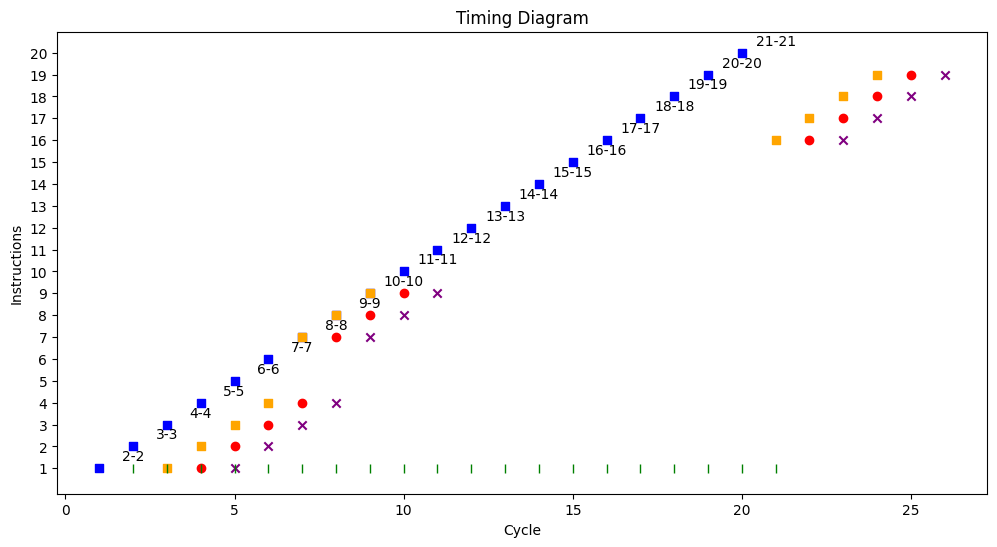

In [11]:
import matplotlib.pyplot as plt

# Timing diagram arrays
issue_at = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
executes_at_start = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
executes_at_end = ["2-2", "3-3", "4-4", "5-5", "6-6", "7-7", "8-8", "9-9", "10-10", "11-11", "12-12", "13-13", "14-14", "15-15", "16-16", "17-17", "18-18", "19-19", "20-20", "21-21"]
mem_at = [3, 4, 5, 6, None, None, 7, 8, 9, None, None, None, None, None, None, 21, 22, 23, 24, None]
cdb_at = [4, 5, 6, 7, None, None, 8, 9, 10, None, None, None, None, None, None, 22, 23, 24, 25, None]
commits_at = [5, 6, 7, 8, None, None, 9, 10, 11, None, None, None, None, None, None, 23, 24, 25, 26, None]

# Plotting the timing diagram
plt.figure(figsize=(12, 6))
plt.title("Timing Diagram")
plt.ylabel("Instructions")
plt.xlabel("Cycle")

# Scatter plot for each stage
plt.scatter(issue_at, range(1, 21), marker='s', color='blue', label='Issue')
plt.vlines(executes_at_start, ymin=[0.8]*20, ymax=[1.2]*20, colors='green', label='Executes', linewidths=1)
plt.scatter(mem_at, range(1, 21), marker='s', color='orange', label='MEM')
plt.scatter(cdb_at, range(1, 21), marker='o', color='red', label='CDB')
plt.scatter(commits_at, range(1, 21), marker='x', color='purple', label='Commits')

# Add Executes range
for i in range(len(executes_at_start)):
    plt.text(executes_at_start[i], i+1.35, executes_at_end[i], horizontalalignment='center')

plt.yticks(range(1, 21))
plt.xticks(range(1, max(commits_at) + 1))

plt.grid(True, which='both', linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()


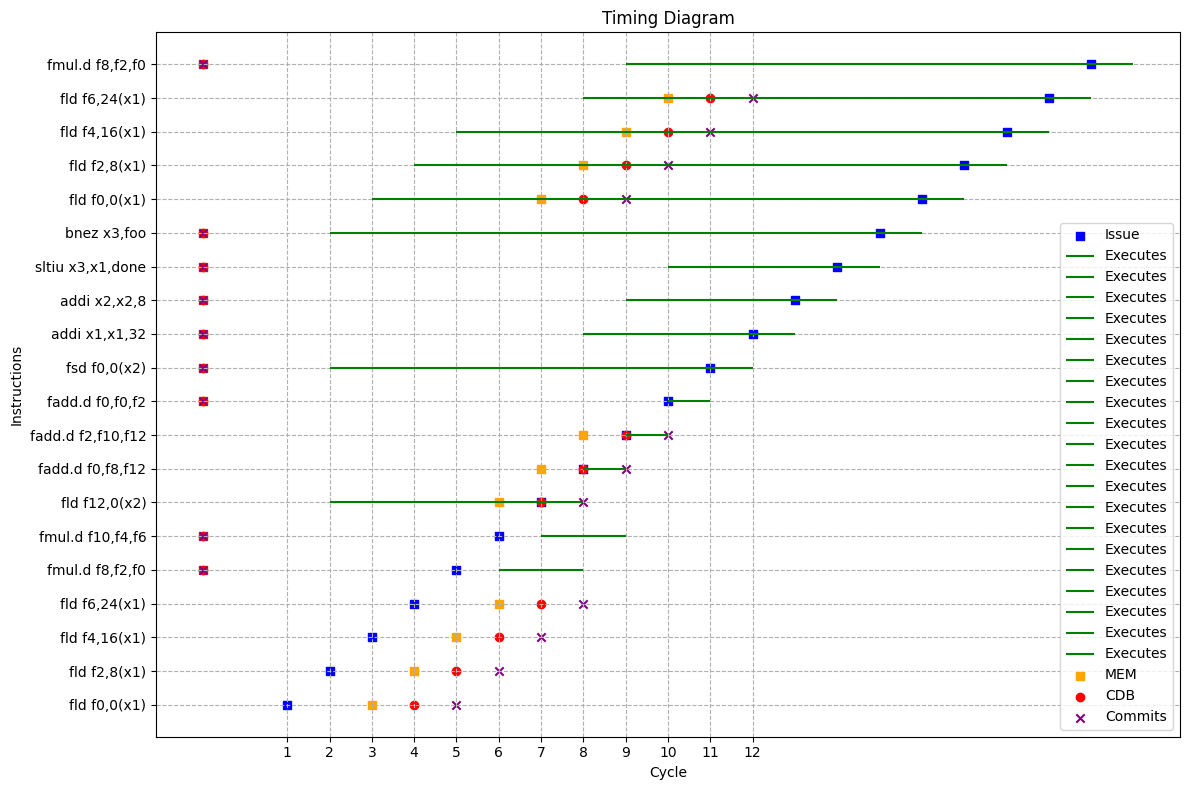

In [12]:
import matplotlib.pyplot as plt

# Timing diagram arrays
instructions = [
    "fld f0,0(x1)",
    "fld f2,8(x1)",
    "fld f4,16(x1)",
    "fld f6,24(x1)",
    "fmul.d f8,f2,f0",
    "fmul.d f10,f4,f6",
    "fld f12,0(x2)",
    "fadd.d f0,f8,f12",
    "fadd.d f2,f10,f12",
    "fadd.d f0,f0,f2",
    "fsd f0,0(x2)",
    "addi x1,x1,32",
    "addi x2,x2,8",
    "sltiu x3,x1,done",
    "bnez x3,foo",
    "fld f0,0(x1)",
    "fld f2,8(x1)",
    "fld f4,16(x1)",
    "fld f6,24(x1)",
    "fmul.d f8,f2,f0"
]

issue_at = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
executes_at_start = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
executes_at_end = [2, 3, 4, 5, 8, 9, 2, 8, 9, 10, 2, 8, 9, 10, 2, 3, 4, 5, 8, 9]
mem_at = [3, 4, 5, 6, -1, -1, 6, 7, 8, -1, -1, -1, -1, -1, -1, 7, 8, 9, 10, -1]
cdb_at = [4, 5, 6, 7, -1, -1, 7, 8, 9, -1, -1, -1, -1, -1, -1, 8, 9, 10, 11, -1]
commits_at = [5, 6, 7, 8, -1, -1, 8, 9, 10, -1, -1, -1, -1, -1, -1, 9, 10, 11, 12, -1]

# Plotting the timing diagram
plt.figure(figsize=(12, 8))
plt.title("Timing Diagram")
plt.ylabel("Instructions")
plt.xlabel("Cycle")

# Scatter plot for each stage
plt.scatter(issue_at, range(1, len(instructions) + 1), marker='s', color='blue', label='Issue')
for i in range(len(executes_at_start)):
    plt.hlines(y=range(i + 1, i + 2), xmin=executes_at_start[i], xmax=executes_at_end[i], colors='green', label='Executes')
plt.scatter(mem_at, range(1, len(instructions) + 1), marker='s', color='orange', label='MEM')
plt.scatter(cdb_at, range(1, len(instructions) + 1), marker='o', color='red', label='CDB')
plt.scatter(commits_at, range(1, len(instructions) + 1), marker='x', color='purple', label='Commits')

plt.yticks(range(1, len(instructions) + 1), instructions)
plt.xticks(range(1, max(commits_at) + 1))

plt.grid(True, which='both', linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()


In [13]:
# Initialize the timing diagram
timing_diagram = []
headers = ['Instruction', 'Issue At', 'Executes At', 'MEM At', 'CDB At', 'Commits At']
timing_diagram.append(headers)

cycle = 1
for instruction in instructions:
    timing_diagram.append([instruction, cycle, f"{cycle}-{cycle+1}", cycle+2, cycle+3, cycle+4])
    cycle += 5

# Display the timing diagram
for row in timing_diagram:
    print('{:<12} {:<9} {:<12} {:<9} {:<9} {:<11}'.format(*row))


Instruction  Issue At  Executes At  MEM At    CDB At    Commits At 
fld f0,0(x1) 1         1-2          3         4         5          
fld f2,8(x1) 6         6-7          8         9         10         
fld f4,16(x1) 11        11-12        13        14        15         
fld f6,24(x1) 16        16-17        18        19        20         
fmul.d f8,f2,f0 21        21-22        23        24        25         
fmul.d f10,f4,f6 26        26-27        28        29        30         
fld f12,0(x2) 31        31-32        33        34        35         
fadd.d f0,f8,f12 36        36-37        38        39        40         
fadd.d f2,f10,f12 41        41-42        43        44        45         
fadd.d f0,f0,f2 46        46-47        48        49        50         
fsd f0,0(x2) 51        51-52        53        54        55         
addi x1,x1,32 56        56-57        58        59        60         
addi x2,x2,8 61        61-62        63        64        65         
sltiu x3,x1,done 66      

For this question only, make the following additional assumptions:

1) The machine has 1 FP multiply unit and 1 FP adder unit.

2) The machine has 4 entries in the reorder buffer.

The first row of the table is given to help get you started:

In [22]:
# Initialize register values
Regs = {
    'x1': 0,  # Assuming x1 = 0 initially
    'x2': 0   # Assuming x2 = 0 initially
}

# Initialize memory values
MEM = [1.2, 3.4, 5.6, 7.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]  # Example values for memory locations

# Initialize reorder buffer
ReorderBuffer = []

# Function to simulate fld instruction
def fld(dest, base, offset):
    Regs[dest] = MEM[Regs[base] + offset]

# Function to simulate fmul.d instruction
def fmul(dest, src1, src2):
    Regs[dest] = Regs[src1] * Regs[src2]

# Function to simulate fadd.d instruction
def fadd(dest, src1, src2):
    Regs[dest] = Regs[src1] + Regs[src2]

# Function to simulate fsd instruction
def fsd(src, base, offset):
    MEM[offset + Regs[base]] = Regs[src]

# Function to simulate addi instruction
def addi(dest, src, immediate):
    Regs[dest] = Regs[src] + immediate

# Function to simulate sltiu instruction
def sltiu(dest, src, immediate):
    Regs[dest] = 1 if Regs[src] < immediate else 0

# Function to simulate bnez instruction
def bnez(src, target):
    return target if Regs[src] != 0 else None

# Start executing the instructions
instructions = [
    {'inst': 'fld', 'dest': 'f0', 'base': 'x1', 'offset': 0},
    {'inst': 'fld', 'dest': 'f2', 'base': 'x1', 'offset': 8},
    {'inst': 'fld', 'dest': 'f4', 'base': 'x1', 'offset': 16},
    {'inst': 'fld', 'dest': 'f6', 'base': 'x1', 'offset': 24},
    {'inst': 'fmul.d', 'dest': 'f8', 'src1': 'f2', 'src2': 'f0'},
    {'inst': 'fmul.d', 'dest': 'f10', 'src1': 'f4', 'src2': 'f6'},
    {'inst': 'fld', 'dest': 'f12', 'base': 'x2', 'offset': 0},
    {'inst': 'fadd.d', 'dest': 'f0', 'src1': 'f8', 'src2': 'f12'},
    {'inst': 'fadd.d', 'dest': 'f2', 'src1': 'f10', 'src2': 'f12'},
    {'inst': 'fadd.d', 'dest': 'f0', 'src1': 'f0', 'src2': 'f2'},
    {'inst': 'fsd', 'src': 'f0', 'base': 'x2', 'offset': 0},
    {'inst': 'addi', 'dest': 'x1', 'src': 'x1', 'immediate': 32},
    {'inst': 'addi', 'dest': 'x2', 'src': 'x2', 'immediate': 8},
    {'inst': 'sltiu', 'dest': 'x3', 'src': 'x1', 'immediate': 100},
    {'inst': 'bnez', 'src': 'x3', 'target': 'foo'},
    {'inst': 'fld', 'dest': 'f0', 'base': 'x1', 'offset': 0},
    {'inst': 'fld', 'dest': 'f2', 'base': 'x1', 'offset': 8},
]

# Initialize the timing diagram
timing_diagram = []
headers = ['Instruction', 'Issue At', 'Executes At', 'MEM At', 'CDB At', 'Commits At']
timing_diagram.append(headers)

# Issue cycle
cycle = 1

for instruction in instructions:
    row = [instruction['inst'], cycle, '', '', '', '']

    if instruction['inst'] == 'fld':
        fld(instruction['dest'], instruction['base'], instruction['offset'])
        row[2] = cycle + 1  # Executes At
        row[3] = cycle + 2  # MEM At
        row[4] = cycle + 3  # CDB At
        row[5] = cycle + 4  # Commits At
    elif instruction['inst'] == 'fmul.d':
        fmul(instruction['dest'], instruction['src1'], instruction['src2'])
        row[2] = cycle + 1  # Executes At
        row[4] = cycle + 1  # CDB At
        row[5] = cycle + 2  # Commits At
    elif instruction['inst'] == 'fadd.d':
        fadd(instruction['dest'], instruction['src1'], instruction['src2'])
        row[2] = cycle + 1  # Executes At
        row[4] = cycle + 1  # CDB At
        row[5] = cycle + 2  # Commits At
    elif instruction['inst'] == 'fsd':
        fsd(instruction['src'], instruction['base'], instruction['offset'])
        row[2] = cycle + 1  # Executes At
        row[5] = cycle + 2  # Commits At
    elif instruction['inst'] == 'addi':
        addi(instruction['dest'], instruction['src'], instruction['immediate'])
        row[2] = cycle + 1  # Executes At
        row[5] = cycle + 2  # Commits At
    elif instruction['inst'] == 'sltiu':
        sltiu(instruction['dest'], instruction['src'], instruction['immediate'])
        row[2] = cycle + 1  # Executes At
        row[5] = cycle + 2  # Commits At
    elif instruction['inst'] == 'bnez':
        target = bnez(instruction['src'], instruction['target'])
        if target is not None:
            row[2] = cycle + 1  # Executes At
            row[5] = 'JMP'  # Commits At
            timing_diagram.append(row)
            print("Branch taken. Jump to", target)
            break
        else:
            row[2] = cycle + 1  # Executes At
            row[5] = cycle + 2  # Commits At

    timing_diagram.append(row)
    cycle += 1

# Display the timing diagram
for row in timing_diagram:
    print('{:<12} {:<9} {:<12} {:<9} {:<9} {:<11}'.format(*row))


Branch taken. Jump to foo
Instruction  Issue At  Executes At  MEM At    CDB At    Commits At 
fld          1         2            3         4         5          
fld          2         3            4         5         6          
fld          3         4            5         6         7          
fld          4         5            6         7         8          
fmul.d       5         6                      6         7          
fmul.d       6         7                      7         8          
fld          7         8            9         10        11         
fadd.d       8         9                      9         10         
fadd.d       9         10                     10        11         
fadd.d       10        11                     11        12         
fsd          11        12                               13         
addi         12        13                               14         
addi         13        14                               15         
sltiu        14       

In [23]:
import pandas as pd

# Define the dynamic instruction trace
dynamic_trace = [
    ("fld", "f0", "0(x1)"),
    ("fld", "f2", "8(x1)"),
    ("fld", "f4", "16(x1)"),
    ("fld", "f6", "24(x1)"),
    ("fmul.d", "f8", "f2", "f0"),
    ("fmul.d", "f10", "f4", "f6"),
    ("fld", "f12", "0(x2)"),
    ("fadd.d", "f0", "f8", "f12"),
    ("fadd.d", "f2", "f10", "f12"),
    ("fadd.d", "f0", "f0", "f2"),
    ("fsd", "f0", "0(x2)"),
    ("addi", "x1", "x1", "32"),
    ("addi", "x2", "x2", "8"),
    ("sltiu", "x3", "x1", "done"),
    ("bnez", "x3", "foo"),
    ("fld", "f0", "0(x1)"),
    ("fld", "f2", "8(x1)"),
    ("fld", "f4", "16(x1)"),
    ("fld", "f6", "24(x1)"),
    ("fmul.d", "f8", "f2", "f0")
]

# Define the machine configuration
reorder_buffer_size = 4
fp_multiply_units = 1
fp_adder_units = 1

# Define the timing diagram table
timing_diagram = pd.DataFrame(columns=["Instruction", "Issues At", "Executes At", "MEM At", "CDB At", "Commits At"])

# Initialize the cycle count
cycle = 1

# Helper function to calculate the number of cycles for each instruction type
def get_num_cycles(instruction):
    if instruction.startswith("fld"):
        return 2
    elif instruction.startswith("fsd"):
        return 1
    elif instruction.startswith("fmul.d"):
        return 4
    elif instruction.startswith("fadd.d"):
        return 2
    elif instruction.startswith("addi"):
        return 1
    elif instruction.startswith("sltiu"):
        return 1
    elif instruction.startswith("bnez"):
        return 1
    else:
        return 1

# Helper function to check if a reservation station is available for an instruction
def is_reservation_station_available(instruction):
    return instruction.startswith("fld") or instruction.startswith("fsd")

# Helper function to check if a reorder buffer entry is available for an instruction
def is_reorder_buffer_entry_available():
    return len(timing_diagram) < reorder_buffer_size

# Iterate through the dynamic instruction trace
for instr in dynamic_trace:
    instruction = instr[0]

    # Check if a reservation station and reorder buffer entry are available
    if is_reservation_station_available(instruction) and is_reorder_buffer_entry_available():
        issues_at = cycle
    else:
        issues_at = "Stalled"

    executes_at = cycle + 1
    mem_at = cycle + 1
    cdb_at = cycle + 2

    # Check if the instruction requires additional cycles for execution
    num_cycles = get_num_cycles(instruction)
    if num_cycles > 1:
        for i in range(num_cycles - 1):
            timing_diagram.loc[cycle + i, "Executes At"] = "Stall"
            timing_diagram.loc[cycle + i, "MEM At"] = "Stall"
            timing_diagram.loc[cycle + i, "CDB At"] = "Stall"

    timing_diagram.loc[cycle, :] = [instruction, issues_at, executes_at, mem_at, cdb_at, cycle + num_cycles]
    cycle += num_cycles

# Display the timing diagram
timing_diagram.reset_index(drop=True, inplace=True)
print(timing_diagram)


   Instruction Issues At Executes At MEM At CDB At Commits At
0          fld         1           2      2      3          3
1          fld         3           4      4      5          5
2          fld         5           6      6      7          7
3          fld         7           8      8      9          9
4       fmul.d   Stalled          10     10     11         13
5          NaN       NaN       Stall  Stall  Stall        NaN
6          NaN       NaN       Stall  Stall  Stall        NaN
7       fmul.d   Stalled          14     14     15         17
8          NaN       NaN       Stall  Stall  Stall        NaN
9          NaN       NaN       Stall  Stall  Stall        NaN
10         fld   Stalled          18     18     19         19
11      fadd.d   Stalled          20     20     21         21
12      fadd.d   Stalled          22     22     23         23
13      fadd.d   Stalled          24     24     25         25
14         fsd   Stalled          26     26     27         26
15      

In [ ]:
import matplotlib.pyplot as plt

# Function to generate the timing diagram
def generate_timing_diagram(cycles):
    plt.figure(figsize=(12, 6))
    plt.grid(True)
    plt.xlabel('Cycle')
    plt.yticks([])
    plt.ylim(0, 1)
    for i, (instr, cycle) in enumerate(cycles.items()):
        plt.plot(cycle, [i] * len(cycle), marker='o', markersize=8)
        plt.text(cycle[0], i, instr, verticalalignment='center', fontsize=10)
    plt.show()

# Dynamic instruction trace
instructions = [
    'fld f0,0(x1)',
    'fld f2,8(x1)',
    'fld f4,16(x1)',
    'fld f6,24(x1)',
    'fmul.d f8,f2,f0',
    'fmul.d f10,f4,f6',
    'fld f12,0(x2)',
    'fadd.d f0,f8,f12',
    'fadd.d f2,f10,f12',
    'fadd.d f0,f0,f2',
    'fsd f0,0(x2)',
    'addi x1,x1,32',
    'addi x2,x2,8',
    'sltiu x3,x1,done',
    'bnez x3,foo',
    'fld f0,0(x1)',
    'fld f2,8(x1)',
    'fld f4,16(x1)',
    'fld f6,24(x1)',
    'fmul.d f8,f2,f0'
]

# Dictionary to store the cycle information for each instruction
cycles = {}

# Start the issue cycle at 1
issue_cycle = 1

# Loop through each instruction
for instr in instructions:
    cycles[instr] = [issue_cycle]  # Append the issue cycle
    # Calculate the execute, MEM, CDB, and commit cycles based on the instruction type
    if 'fld' in instr or 'addi' in instr or 'sltiu' in instr:
        ex_cycles = 1
        mem_cycles = 0
        cdb_cycles = 0
        commit_cycles = 1
    elif 'fsd' in instr:
        ex_cycles = 1
        mem_cycles = 0
        cdb_cycles = 0
        commit_cycles = 1
    elif 'fadd.d' in instr:
        ex_cycles = 2
        mem_cycles = 0
        cdb_cycles = 1
        commit_cycles = 1
    elif 'fmul.d' in instr:
        ex_cycles = 4
        mem_cycles = 0
        cdb_cycles = 1
        commit_cycles = 1
    elif 'bnez' in instr:
        ex_cycles = 1
        mem_cycles = 0
        cdb_cycles = 0
        commit_cycles = 1
    else:
        raise ValueError('Unknown instruction type')

    # Update the cycle for execute, MEM, CDB, and commit
    execute_cycle = issue_cycle + ex_cycles
    mem_cycle = execute_cycle + mem_cycles
    cdb_cycle = mem_cycle + cdb_cycles
    commit_cycle = cdb_cycle + commit_cycles

    # Append the cycles to the corresponding instruction
    cycles[instr].extend([execute_cycle, mem_cycle, cdb_cycle, commit_cycle])

    # Increment the issue cycle for the next instruction
    issue_cycle += 1

# Generate the timing diagram
generate_timing_diagram(cycles)


In [25]:
import pandas as pd

# Define the instruction trace
instruction_trace = [
    "fld f0,0(x1)",
    "fld f2,8(x1)",
    "fld f4,16(x1)",
    "fld f6,24(x1)",
    "fmul.d f8,f2,f0",
    "fmul.d f10,f4,f6",
    "fld f12,0(x2)",
    "fadd.d f0,f8,f12",
    "fadd.d f2,f10,f12",
    "fadd.d f0,f0,f2",
    "fsd f0,0(x2)",
    "addi x1,x1,32",
    "addi x2,x2,8",
    "sltiu x3,x1,done",
    "bnez x3,foo",
    "fld f0,0(x1)",
    "fld f2,8(x1)",
    "fld f4,16(x1)",
    "fld f6,24(x1)",
    "fmul.d f8,f2,f0"
]

# Define the machine configuration
issue_cycles = []
execute_cycles = []
mem_cycles = []
cdb_cycles = []
commit_cycles = []

# Define the assumptions for each instruction type
instructions = {
    "fld": {"issue": 1, "execute": 1, "mem": 1, "cdb": 1, "commit": 1},
    "fmul.d": {"issue": 1, "execute": 4, "mem": 0, "cdb": 1, "commit": 1},
    "fadd.d": {"issue": 1, "execute": 2, "mem": 0, "cdb": 1, "commit": 1},
    "fsd": {"issue": 1, "execute": 1, "mem": 0, "cdb": 0, "commit": 1},
    "addi": {"issue": 1, "execute": 1, "mem": 0, "cdb": 1, "commit": 1},
    "sltiu": {"issue": 1, "execute": 1, "mem": 0, "cdb": 1, "commit": 1},
    "bnez": {"issue": 1, "execute": 1, "mem": 0, "cdb": 0, "commit": 1}
}

# Iterate through the instruction trace
for i, instruction in enumerate(instruction_trace):
    # Determine the cycle for each stage
    issue_cycle = i + 1
    execute_cycle = issue_cycle + instructions[instruction.split()[0]]["issue"]
    mem_cycle = execute_cycle + instructions[instruction.split()[0]]["execute"]
    cdb_cycle = mem_cycle + instructions[instruction.split()[0]]["mem"]
    commit_cycle = cdb_cycle + instructions[instruction.split()[0]]["cdb"]

    # Append the cycles to the machine configuration
    issue_cycles.append(issue_cycle)
    execute_cycles.append(execute_cycle)
    mem_cycles.append(mem_cycle)
    cdb_cycles.append(cdb_cycle)
    commit_cycles.append(commit_cycle)

# Create the timing diagram table
timing_diagram = pd.DataFrame({
    "Instruction": instruction_trace,
    "Issues At": issue_cycles,
    "Executes At": execute_cycles,
    "MEM At": mem_cycles,
    "CDB At": cdb_cycles,
    "Commits At": commit_cycles
})

# Print the timing diagram
print(timing_diagram)


          Instruction  Issues At  Executes At  MEM At  CDB At  Commits At
0        fld f0,0(x1)          1            2       3       4           5
1        fld f2,8(x1)          2            3       4       5           6
2       fld f4,16(x1)          3            4       5       6           7
3       fld f6,24(x1)          4            5       6       7           8
4     fmul.d f8,f2,f0          5            6      10      10          11
5    fmul.d f10,f4,f6          6            7      11      11          12
6       fld f12,0(x2)          7            8       9      10          11
7    fadd.d f0,f8,f12          8            9      11      11          12
8   fadd.d f2,f10,f12          9           10      12      12          13
9     fadd.d f0,f0,f2         10           11      13      13          14
10       fsd f0,0(x2)         11           12      13      13          13
11      addi x1,x1,32         12           13      14      14          15
12       addi x2,x2,8         13      

In [26]:
import pandas as pd

# Define the dynamic instruction trace
instruction_trace = [
    "fld f0,0(x1)",
    "fld f2,8(x1)",
    "fld f4,16(x1)",
    "fld f6,24(x1)",
    "fmul.d f8,f2,f0",
    "fmul.d f10,f4,f6",
    "fld f12,0(x2)",
    "fadd.d f0,f8,f12",
    "fadd.d f2,f10,f12",
    "fadd.d f0,f0,f2",
    "fsd f0,0(x2)",
    "addi x1,x1,32",
    "addi x2,x2,8",
    "sltiu x3,x1,done",
    "bnez x3,foo",
    "fld f0,0(x1)",
    "fld f2,8(x1)",
    "fld f4,16(x1)",
    "fld f6,24(x1)",
    "fmul.d f8,f2,f0",
]

# Define the timing diagram DataFrame
timing_diagram = pd.DataFrame(columns=["Instruction", "Issues At", "Executes At", "MEM At", "CDB At", "Commits At"])

# Define the initial cycle
cycle = 1

# Process each instruction in the trace
for instruction in instruction_trace:
    # Calculate the issue, execute, MEM, CDB, and commit cycles
    issues_at = cycle
    executes_at = cycle + 1
    mem_at = executes_at + 1 if "fld" in instruction else executes_at
    cdb_at = mem_at + 1 if "fld" in instruction else executes_at
    commits_at = cdb_at + 1

    # Add the instruction and its corresponding cycles to the timing diagram
    timing_diagram.loc[cycle] = [instruction, issues_at, executes_at, mem_at, cdb_at, commits_at]

    # Increment the cycle counter
    cycle += 1

# Print the timing diagram
print(timing_diagram)


          Instruction  Issues At  Executes At  MEM At  CDB At  Commits At
1        fld f0,0(x1)          1            2       3       4           5
2        fld f2,8(x1)          2            3       4       5           6
3       fld f4,16(x1)          3            4       5       6           7
4       fld f6,24(x1)          4            5       6       7           8
5     fmul.d f8,f2,f0          5            6       6       6           7
6    fmul.d f10,f4,f6          6            7       7       7           8
7       fld f12,0(x2)          7            8       9      10          11
8    fadd.d f0,f8,f12          8            9       9       9          10
9   fadd.d f2,f10,f12          9           10      10      10          11
10    fadd.d f0,f0,f2         10           11      11      11          12
11       fsd f0,0(x2)         11           12      12      12          13
12      addi x1,x1,32         12           13      13      13          14
13       addi x2,x2,8         13      